In [7]:
import pandas as pd
import numpy as np
from fbprophet import Prophet

In [8]:
columns=['ds','y']
df=pd.read_table('../lstm/lstmData/lstmPrac13.csv', sep=',',header=None,names=columns )
sales=list(df['y'])
sales
df['y']=np.log(df['y'])

In [9]:
df

,ds,y
0,2010-02-05,10.123607
1,2010-02-12,10.737255
2,2010-02-19,10.635748
3,2010-02-26,9.873211
4,2010-03-05,9.990944
5,2010-03-12,9.954342
6,2010-03-19,10.004989
7,2010-03-26,10.174629
8,2010-04-02,10.955330
9,2010-04-09,10.668046


Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


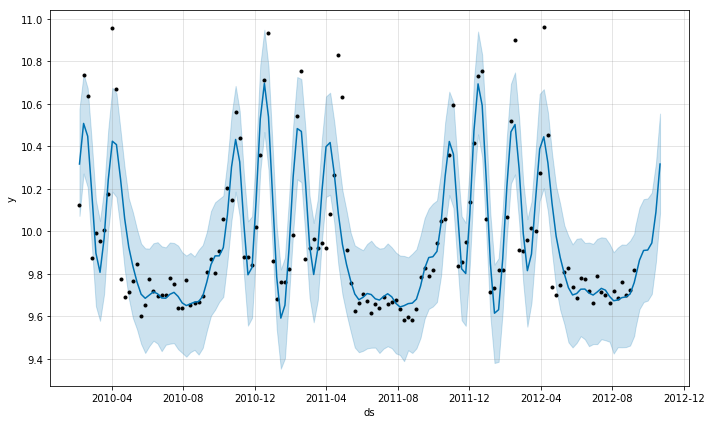

In [10]:
#값에 0이 있으면 log를 할 때 inf가 되므로 Initialization failed. 오류가 나니 주의할 것.
m = Prophet(yearly_seasonality=True)
m.fit(df)
future = m.make_future_dataframe(periods=7, freq='W')
fcst=m.predict(future)
m.plot(fcst)

In [14]:
fcst

,ds,t,trend,seasonal_lower,seasonal_upper,trend_lower,trend_upper,yhat_lower,yhat_upper,yearly,yearly_lower,yearly_upper,seasonal,yhat
0,2010-02-05,0.000000,9.968067,0.348415,0.348415,9.968067,9.968067,10.072537,10.576083,0.348415,0.348415,0.348415,0.348415,10.316482
1,2010-02-12,0.007407,9.967934,0.539498,0.539498,9.967934,9.967934,10.271813,10.739512,0.539498,0.539498,0.539498,0.539498,10.507432
2,2010-02-19,0.014815,9.967801,0.479445,0.479445,9.967801,9.967801,10.207152,10.673187,0.479445,0.479445,0.479445,0.479445,10.447246
3,2010-02-26,0.022222,9.967668,0.211839,0.211839,9.967668,9.967668,9.934980,10.418290,0.211839,0.211839,0.211839,0.211839,10.179507
4,2010-03-05,0.029630,9.967534,-0.070495,-0.070495,9.967534,9.967534,9.647367,10.146119,-0.070495,-0.070495,-0.070495,-0.070495,9.897039
5,2010-03-12,0.037037,9.967401,-0.160290,-0.160290,9.967401,9.967401,9.579004,10.049177,-0.160290,-0.160290,-0.160290,-0.160290,9.807111
6,2010-03-19,0.044444,9.967268,-0.000193,-0.000193,9.967268,9.967268,9.706199,10.197255,-0.000193,-0.000193,-0.000193,-0.000193,9.967075
7,2010-03-26,0.051852,9.967135,0.274201,0.274201,9.967135,9.967135,10.002310,10.478051,0.274201,0.274201,0.274201,0.274201,10.241336
8,2010-04-02,0.059259,9.967002,0.456790,0.456790,9.967002,9.967002,10.186507,10.675260,0.456790,0.456790,0.456790,0.456790,10.423792
9,2010-04-09,0.066667,9.966868,0.440914,0.440914,9.966868,9.966868,10.161132,10.649223,0.440914,0.440914,0.440914,0.440914,10.407782


In [17]:
fcst[-8:]

,ds,t,trend,seasonal_lower,seasonal_upper,trend_lower,trend_upper,yhat_lower,yhat_upper,yearly,yearly_lower,yearly_upper,seasonal,yhat
135,2012-09-07,1.000000,9.988931,-0.230246,-0.230246,9.988931,9.988931,9.508269,9.988774,-0.230246,-0.230246,-0.230246,-0.230246,9.758684
136,2012-09-09,1.002116,9.989103,-0.207750,-0.207750,9.989103,9.989103,9.544540,10.026241,-0.207750,-0.207750,-0.207750,-0.207750,9.781353
137,2012-09-16,1.009524,9.989707,-0.125523,-0.125523,9.989705,9.989710,9.633659,10.111153,-0.125523,-0.125523,-0.125523,-0.125523,9.864184
138,2012-09-23,1.016931,9.990311,-0.080425,-0.080425,9.990292,9.990335,9.667163,10.151160,-0.080425,-0.080425,-0.080425,-0.080425,9.909886
139,2012-09-30,1.024339,9.990915,-0.079179,-0.079179,9.990869,9.990967,9.673986,10.154771,-0.079179,-0.079179,-0.079179,-0.079179,9.911735
140,2012-10-07,1.031746,9.991518,-0.046439,-0.046439,9.991441,9.991603,9.705299,10.182179,-0.046439,-0.046439,-0.046439,-0.046439,9.945080
141,2012-10-14,1.039153,9.992122,0.098786,0.098786,9.992004,9.992241,9.856159,10.319617,0.098786,0.098786,0.098786,0.098786,10.090909
142,2012-10-21,1.046561,9.992726,0.323666,0.323666,9.992572,9.992886,10.084023,10.553770,0.323666,0.323666,0.323666,0.323666,10.316392


In [18]:
list(np.exp(fcst[-8:]['yhat']))

[17303.848009273333,
 17700.583113000415,
 19229.182403821651,
 20128.378559096491,
 20165.633227065409,
 20849.386213618429,
 24122.702773358149,
 30223.999777837529]

In [22]:
np.exp(fcst[135:]['yhat'])

135    17303.848009
136    17700.583113
137    19229.182404
138    20128.378559
139    20165.633227
140    20849.386214
141    24122.702773
142    30223.999778
Name: yhat, dtype: float64